### Try Model: Decision Tree Regression

In [1]:
from Starts.startmodskl import *

# Process Nan_Column by dropping them
StartML.nan_columns(nonan_data)

local_kwargs {'data_path_1': '2_Titanic/data/train.csv', 'nan_mean_neighbors': False, 'data_path_2': '2_Titanic/data/titanic_no_nan.csv', 'nan_mean': True, 'nan_drop_row': False, 'nan_drop_col': False, 'drop_obj_col': False, 'nan_zero': False, 'data_path_3': '2_Titanic/data/test.csv'}


[]

In [2]:
# There are only numeric columns
StartML.idx_columns(nonan_data)

[('Survived', 0, dtype('int64')),
 ('Pclass', 1, dtype('int64')),
 ('Sex', 2, dtype('int64')),
 ('Age', 3, dtype('float64')),
 ('Ticket', 4, dtype('int64')),
 ('Fare', 5, dtype('float64')),
 ('Title', 6, dtype('int64')),
 ('FamilySize', 7, dtype('int64'))]

In [3]:
nonan_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Title,FamilySize
0,0,3,1,49.0,574,0.0000,5,0
1,1,2,0,7.0,571,26.2500,4,2
2,0,3,1,33.0,378,8.6625,5,0
3,0,3,1,24.0,519,24.1500,5,2
4,1,1,0,30.0,0,86.5000,4,0


In [4]:
StartMod.feature_scaling(nonan_data).head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Title,FamilySize
0,0.0,1.0,1.0,0.610455,0.844118,0.000000,0.625,0.0
1,1.0,0.5,0.0,0.082684,0.839706,0.051237,0.500,0.2
2,0.0,1.0,1.0,0.409399,0.555882,0.016908,0.625,0.0
3,0.0,1.0,1.0,0.296306,0.763235,0.047138,0.625,0.2
4,1.0,0.0,0.0,0.371701,0.000000,0.168837,0.500,0.0


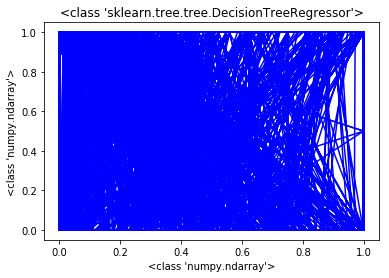

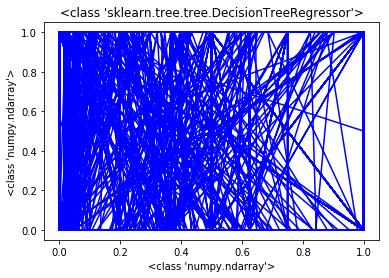

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [5]:
# Choose method Linear Regression to predict the Survivors
reg_dt, y_true, y_predict = StartModSKL.regression_decision_tree(nonan_data, 'Survived')

reg_dt

In [6]:
y_predict

array([1. , 0. , 1. , 0. , 0. , 0. , 1. , 0. , 1. , 0. , 1. , 0. , 0. ,
       0. , 0. , 0. , 1. , 0. , 1. , 1. , 0. , 1. , 1. , 0. , 0. , 1. ,
       0. , 0. , 0. , 1. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 0. , 0. ,
       1. , 1. , 0. , 0. , 1. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ,
       1. , 1. , 0. , 0. , 0. , 1. , 0. , 0. , 1. , 0. , 1. , 0. , 0. ,
       1. , 0. , 0. , 1. , 0. , 0. , 1. , 0. , 1. , 0. , 1. , 0. , 0. ,
       1. , 0. , 0. , 0. , 1. , 0. , 1. , 1. , 0. , 1. , 1. , 0. , 0. ,
       1. , 1. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 1. , 1. , 1. , 0. , 0. , 1. , 0. , 0. , 0. , 1. , 1. ,
       0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 1. , 0. , 0. , 0. , 0. ,
       0. , 0. , 1. , 0. , 0. , 1. , 0. , 1. , 0.5, 0. , 0. , 0. , 1. ,
       0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 1. ,
       0. , 1. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 1. , 0. , 0. ,
       0. , 0. , 1. , 1. , 0. , 1. , 0. , 0. , 1. , 0. ])

In [7]:
# Convert predicted value by rounding it (>0.5 will be considered as 1 else 0)
y_pred = np.array([np.round(item) for item in y_predict ])

# Compare the predicted value with true_value
len(y_true), len(y_pred)

(179, 179)

In [8]:
StartMod.metrics_report(y_true, y_pred)

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.79      0.81      0.80       115
        1.0       0.65      0.62      0.63        64

avg / total       0.74      0.74      0.74       179

Confusion Matrix: 
 [[93 22]
 [24 40]]

Accuracy: 
 0.7430167597765364


### Result: 
#### the correct predicted result 140, 
#### the wrong predicted result 39